In [1]:
#tutorial https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
# https://stackoverflow.com/questions/52273543/creating-multiple-boxplots-on-the-same-graph-from-a-dictionary
# https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
from time import sleep
import warnings
import requests
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from bs4 import BeautifulSoup
import os
from scipy.stats import ks_2samp
from scipy import stats
# La directory viene cambiata puntando alla directory padre per raggiungere più facilmente i risultati
os.chdir("..")

Confronto distribuzioni intere - con dataset con feature numeriche

[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Missing Value'),
 Text(4, 0, 'Suspect Sign')]

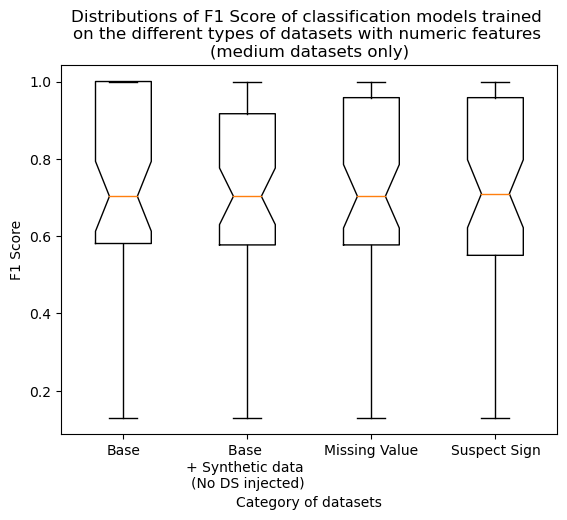

In [2]:

df_plot_base = pd.read_csv("./outputComparisons/Combined/General/base_numeric_medium.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Combined/General/base_synthetic_numeric_medium.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Combined/General/missing_values_medium.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Combined/General/suspect_sign_medium.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
dict_df = {"Base" : list(df_plot_base["F1 Score"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["F1 Score"]), "Missing Value": list(df_plot_missingvalues["F1 Score"]), "Suspect Sign": list(df_plot_suspectsign["F1 Score"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of F1 Score of classification models trained \non the different types of datasets with numeric features \n(medium datasets only)")
box.set_xlabel("Category of datasets")
box.set_ylabel("F1 Score")
box.set_xticklabels(dict_df.keys())

In [3]:
print("F1 Score - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["F1 Score"], df_plot_base_synthetic["F1 Score"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["F1 Score"], df_plot_base_synthetic["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue < 0.05):
    print("Base vs Missing Value - pvalue: ", ks_2samp(df_plot_base["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue < 0.05):
    print("Base vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue < 0.05):
    print("Base+Synthetic vs Missing Value - pvalue: ", ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue < 0.05):
    print("Base+Synthetic vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue)

F1 Score - Differences using Kolmogorov-Smirnov Test


In [4]:
print(stats.shapiro(df_plot_base["F1 Score"]))
print(stats.shapiro(df_plot_base_synthetic["F1 Score"]))
print(stats.shapiro(df_plot_suspectsign["F1 Score"]))
print(stats.shapiro(df_plot_missingvalues["F1 Score"]))
#p-value minore di 0.05, ipotesi che abbiano distribuzione normale è rigettata

ShapiroResult(statistic=0.856329619884491, pvalue=1.4138439837552141e-05)
ShapiroResult(statistic=0.8888639807701111, pvalue=0.0001376758300466463)
ShapiroResult(statistic=0.8850498199462891, pvalue=0.00010376905993325636)
ShapiroResult(statistic=0.8665696382522583, pvalue=2.8044902137480676e-05)


[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Missing Value'),
 Text(4, 0, 'Suspect Sign')]

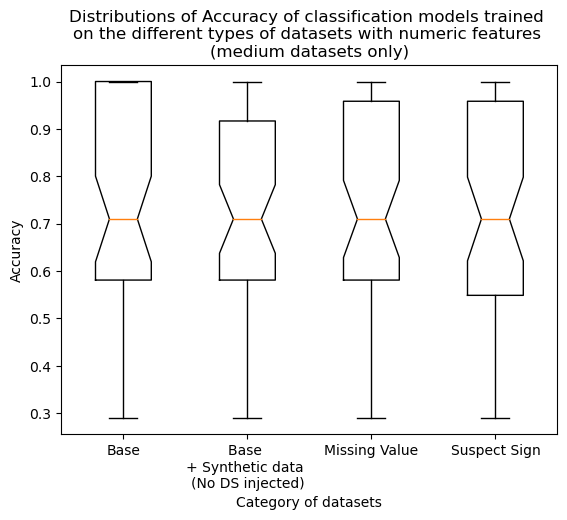

In [5]:

df_plot_base = pd.read_csv("./outputComparisons/Combined/General/base_numeric_medium.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Combined/General/base_synthetic_numeric_medium.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Combined/General/missing_values_medium.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Combined/General/suspect_sign_medium.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
dict_df = {"Base" : list(df_plot_base["Accuracy"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["Accuracy"]), "Missing Value": list(df_plot_missingvalues["Accuracy"]), "Suspect Sign": list(df_plot_suspectsign["Accuracy"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of Accuracy of classification models trained \non the different types of datasets with numeric features \n(medium datasets only)")
box.set_xlabel("Category of datasets")
box.set_ylabel("Accuracy")
box.set_xticklabels(dict_df.keys())

In [6]:
print("Accuracy - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["Accuracy"], df_plot_base_synthetic["Accuracy"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["Accuracy"], df_plot_base_synthetic["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Accuracy"], df_plot_missingvalues["Accuracy"]).pvalue < 0.05):
    print("Base vs Missing Value - pvalue: ", ks_2samp(df_plot_base["Accuracy"], df_plot_missingvalues["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Accuracy"], df_plot_suspectsign["Accuracy"]).pvalue < 0.05):
    print("Base vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base["Accuracy"], df_plot_suspectsign["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_missingvalues["Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Missing Value - pvalue: ", ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_missingvalues["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_suspectsign["Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_suspectsign["Accuracy"]).pvalue)

Accuracy - Differences using Kolmogorov-Smirnov Test


[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Missing Value'),
 Text(4, 0, 'Suspect Sign')]

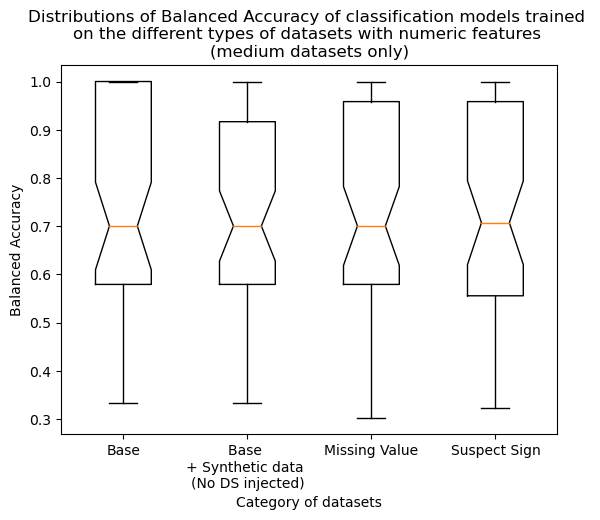

In [7]:

df_plot_base = pd.read_csv("./outputComparisons/Combined/General/base_numeric_medium.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Combined/General/base_synthetic_numeric_medium.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Combined/General/missing_values_medium.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Combined/General/suspect_sign_medium.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
dict_df = {"Base" : list(df_plot_base["Balanced Accuracy"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["Balanced Accuracy"]), "Missing Value": list(df_plot_missingvalues["Balanced Accuracy"]), "Suspect Sign": list(df_plot_suspectsign["Balanced Accuracy"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of Balanced Accuracy of classification models trained \non the different types of datasets with numeric features \n(medium datasets only)")
box.set_xlabel("Category of datasets")
box.set_ylabel("Balanced Accuracy")
box.set_xticklabels(dict_df.keys())

In [8]:
print("Balanced Accuracy - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_base_synthetic["Balanced Accuracy"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_base_synthetic["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_missingvalues["Balanced Accuracy"]).pvalue < 0.05):
    print("Base vs Missing Value - pvalue: ", ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_missingvalues["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_suspectsign["Balanced Accuracy"]).pvalue < 0.05):
    print("Base vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_suspectsign["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_missingvalues["Balanced Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Missing Value - pvalue: ", ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_missingvalues["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_suspectsign["Balanced Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_suspectsign["Balanced Accuracy"]).pvalue)

Balanced Accuracy - Differences using Kolmogorov-Smirnov Test


[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Missing Value'),
 Text(4, 0, 'Suspect Sign')]

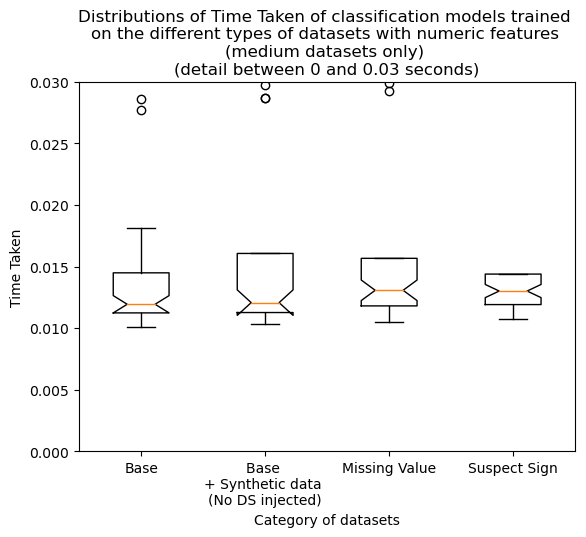

In [9]:

df_plot_base = pd.read_csv("./outputComparisons/Combined/General/base_numeric_medium.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Combined/General/base_synthetic_numeric_medium.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Combined/General/missing_values_medium.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Combined/General/suspect_sign_medium.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
dict_df = {"Base" : list(df_plot_base["Time Taken"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["Time Taken"]), "Missing Value": list(df_plot_missingvalues["Time Taken"]), "Suspect Sign": list(df_plot_suspectsign["Time Taken"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of Time Taken of classification models trained \non the different types of datasets with numeric features \n(medium datasets only) \n(detail between 0 and 0.03 seconds)")
box.set_xlabel("Category of datasets")
box.set_ylabel("Time Taken")
box.set_ylim(0, 0.03)
box.set_xticklabels(dict_df.keys())

In [10]:
print("Time Taken - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["Time Taken"], df_plot_base_synthetic["Time Taken"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["Time Taken"], df_plot_base_synthetic["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base["Time Taken"], df_plot_missingvalues["Time Taken"]).pvalue < 0.05):
    print("Base vs Missing Value - pvalue: ", ks_2samp(df_plot_base["Time Taken"], df_plot_missingvalues["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base["Time Taken"], df_plot_suspectsign["Time Taken"]).pvalue < 0.05):
    print("Base vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base["Time Taken"], df_plot_suspectsign["Time Taken"]))
    print("Base:\n",df_plot_base["Time Taken"].describe())
    print("Suspect Sign:\n",df_plot_suspectsign["Time Taken"].describe())
if(ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_missingvalues["Time Taken"]).pvalue < 0.05):
    print("Base+Synthetic vs Missing Value - pvalue: ", ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_missingvalues["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_suspectsign["Time Taken"]).pvalue < 0.05):
    print("Base+Synthetic vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_suspectsign["Time Taken"]))
    print("Base+Synthetic:\n",df_plot_base_synthetic["Time Taken"].describe())
    print("Suspect Sign:\n",df_plot_suspectsign["Time Taken"].describe())

Time Taken - Differences using Kolmogorov-Smirnov Test
Base vs Suspect Sign - pvalue:  KstestResult(statistic=0.3018867924528302, pvalue=0.015517958259340086, statistic_location=0.0124130249023437, statistic_sign=1)
Base:
 count    53.000000
mean      0.028159
std       0.036002
min       0.010069
25%       0.011235
50%       0.011937
75%       0.014488
max       0.148721
Name: Time Taken, dtype: float64
Suspect Sign:
 count    53.000000
mean      0.033257
std       0.042916
min       0.010770
25%       0.011911
50%       0.013010
75%       0.014386
max       0.166364
Name: Time Taken, dtype: float64
Base+Synthetic vs Suspect Sign - pvalue:  KstestResult(statistic=0.2641509433962264, pvalue=0.04912933177517805, statistic_location=0.0121300220489501, statistic_sign=1)
Base+Synthetic:
 count    53.000000
mean      0.032334
std       0.044500
min       0.010358
25%       0.011265
50%       0.012070
75%       0.016061
max       0.223869
Name: Time Taken, dtype: float64
Suspect Sign:
 count